In [1]:
import torch
from torch import nn # contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt
import numpy as np

# Check PyTorch version
torch.__version__

'1.12.0+cpu'

# Data (preparing and loading)



In [14]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create 
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim = 1)
y = weight * X + bias

In [15]:
# Looking at the values
X[:10], y[:10], len (X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

In [20]:
y_train

tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260],
        [0.4400],
        [0.4540],
        [0.4680],
        [0.4820],
        [0.4960],
        [0.5100],
        [0.5240],
        [0.5380],
        [0.5520],
        [0.5660],
        [0.5800],
        [0.5940],
        [0.6080],
        [0.6220],
        [0.6360],
        [0.6500],
        [0.6640],
        [0.6780],
        [0.6920],
        [0.7060],
        [0.7200],
        [0.7340],
        [0.7480],
        [0.7620],
        [0.7760],
        [0.7900],
        [0.8040],
        [0.8180],
        [0.8320],
        [0.8460]])

In [21]:
# create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [287]:
# Visualizing

def plot_predictions(train_data = X_train, 
                    train_labels = y_train,
                    test_data = X_test,
                    test_labels = y_test,
                    predictions=None):
    """
    Plots trainning data, test data, and compares predictions
    """
    plt.figure(figsize=(10,7))
    
    #Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label = "training data")
    
    # Plot test data in green
    plt.scatter(test_data, test_labels, c = "g", s=4, label = "Testing data")
    
    #Are there predictions?
    if predictions is not None:
        #Plot the predictions if they exist
        plt.scatter(test_data, predictions, c = "r", s=4, label = "Predictions")
        
    # Show the legend
    plt.legend(prop={"size":14})

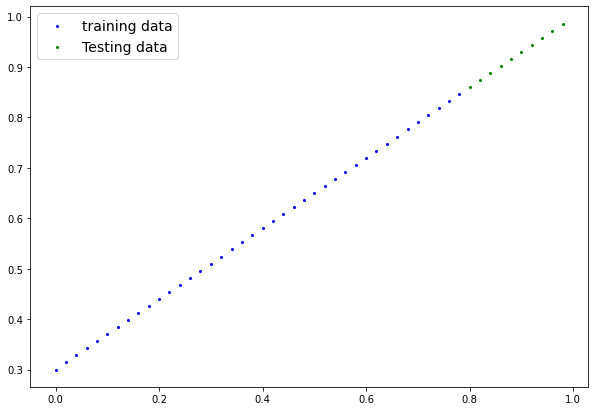

In [288]:
plot_predictions()

In [289]:
# Create a linear regression omdel class

In [309]:
class LinearRegressionModel(nn.Module): # <- Almost everything in PyTorch inherits from nn.Modeuls
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.rand(1,
                                              requires_grad=True,
                                              dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    #Forward method to define the computation in the model
    def forward(self, x:torch.Tensor) -> torch.Tensor: #<- "x" is the input data
        return self.weights * x + self.bias # this is the linear regression formula


In [344]:
# Create a random seed
torch.manual_seed(42)

#Create an instance of the model (this is a subclass of nn.Module)

model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([-0.6382], requires_grad=True)]

In [301]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([-0.6382]))])

In [302]:
weight, bias

(0.7, 0.3)

# Making prediction using 'torch.inference_mode()'

In [313]:
# make predicitons with model

with torch.inference_mode(): #removes all gradient tracking, makes the code faster if no need for tracking
    y_preds = model_0(X_test)
    
y_preds

tensor([[0.0677],
        [0.0853],
        [0.1030],
        [0.1206],
        [0.1382],
        [0.1559],
        [0.1735],
        [0.1912],
        [0.2088],
        [0.2265]])

In [311]:
y_preds = model_0(X_test)

In [305]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

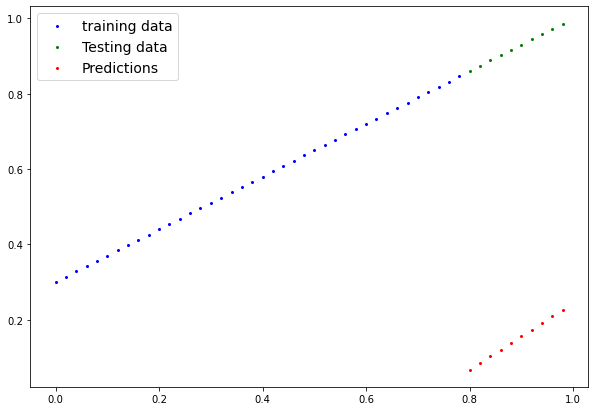

In [314]:
plot_predictions(predictions=y_preds)

In [345]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                           lr=0.001) #lr = learning rate

In [346]:
torch.manual_seed(42)
# an epock is one loop through the data... (this is a hyperparameter because we've set it ourselves)

epochs = 3000

# Track different values
epoch_count = []
loss_values = []
test_loss_values = []


# 1. loop through the data

for epoch in range(epochs):
    model_0.train() # train mode in PyTorch sets all parameters that require gradients to require gradients
    
    #Forward pass
    y_pred = model_0(X_train) #We learn patterns on the training data to evaluate our model on the test data
    
    #Calculate the loss
    loss = loss_fn(y_pred, y_train) #(input, target)
#     print(f"Loss: {loss}")
    
    
    # Optimizer zero grad
    optimizer.zero_grad()
    
    # Perform backpropogation on the loss with respect to the parameters of the model
    loss.backward()
    
    # Step the optimizer (perform gradient descent)
    optimizer.step() # by default how the optimizer changes will acculimate through the loop so.. we have to zero them above in step 3 for the next iteration of the loop
    
    ### Testing
    model_0.eval() # turns off different settings in the model not needed for evaluation/testing
    with torch.inference_mode(): # turns off gradient tracking n a couple of more things behind the scenes
        # 1. Do the forward pass
        test_pred = model_0(X_test)
        
        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)
    
    # Print out what's happening
    if epoch % 100 == 0:
        
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
    
        # Print out model state_dict()
        print(model_0.state_dict())

Epoch: 0 | Loss: 0.8670692443847656 | Test loss: 0.7745875120162964
OrderedDict([('weights', tensor([0.8827])), ('bias', tensor([-0.6372]))])
Epoch: 100 | Loss: 0.7518607378005981 | Test loss: 0.6398794054985046
OrderedDict([('weights', tensor([0.9217])), ('bias', tensor([-0.5372]))])
Epoch: 200 | Loss: 0.6366522908210754 | Test loss: 0.5051712989807129
OrderedDict([('weights', tensor([0.9607])), ('bias', tensor([-0.4372]))])
Epoch: 300 | Loss: 0.5214439034461975 | Test loss: 0.37046319246292114
OrderedDict([('weights', tensor([0.9997])), ('bias', tensor([-0.3372]))])
Epoch: 400 | Loss: 0.4062329828739166 | Test loss: 0.23574963212013245
OrderedDict([('weights', tensor([1.0387])), ('bias', tensor([-0.2372]))])
Epoch: 500 | Loss: 0.2910206913948059 | Test loss: 0.1010347232222557
OrderedDict([('weights', tensor([1.0777])), ('bias', tensor([-0.1372]))])
Epoch: 600 | Loss: 0.17580853402614594 | Test loss: 0.03444422036409378
OrderedDict([('weights', tensor([1.1167])), ('bias', tensor([-0.

In [330]:
weight, bias

(0.7, 0.3)

In [347]:
with torch.inference_mode():
    y_pred_new = model_0(X_test)

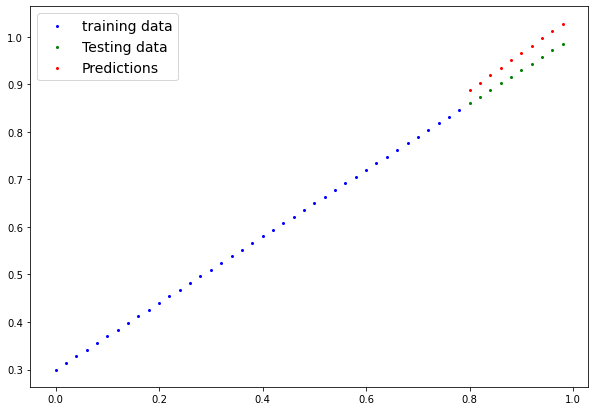

In [348]:
plot_predictions(predictions=y_pred_new)

array([0.86706924, 0.75186074, 0.6366523 , 0.5214439 , 0.40623298,
       0.2910207 , 0.17580853, 0.11182554, 0.09523045, 0.08845304,
       0.08410903, 0.08050527, 0.07697675, 0.07348688, 0.07005207,
       0.06661776, 0.06318317, 0.05974863, 0.05631426, 0.0528795 ,
       0.04944494, 0.04601091, 0.04257581, 0.03914189, 0.03570672,
       0.03227275, 0.02883819, 0.02540337, 0.02196906, 0.01853444],
      dtype=float32)

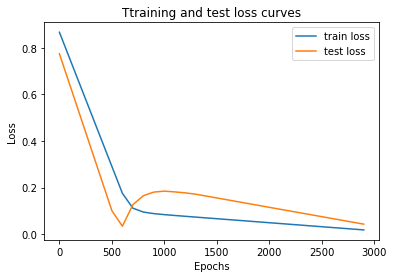

In [358]:
# Plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label = "train loss")
plt.plot(epoch_count, np.array(torch.tensor(test_loss_values).numpy()), label = "test loss")
plt.title("Ttraining and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();